<a href="https://colab.research.google.com/github/janicewee/STB/blob/main/STB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the excel spreadsheet into Pandas for preliminary checks

In [8]:
import pandas as pd

# Correct raw URL to your Excel file on GitHub
url = 'https://raw.githubusercontent.com/janicewee/STB/main/data.xlsx'

# Read the Excel file directly from the URL
df = pd.read_excel(url, sheet_name='data')

# Display the first few rows to confirm it loaded
df.head()

# Provide basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22974 entries, 0 to 22973
Data columns (total 51 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   case                                                 22972 non-null  float64
 1   year                                                 22974 non-null  int64  
 2   month                                                22974 non-null  int64  
 3   Country of Residence                                 22974 non-null  object 
 4   City of Residence                                    22962 non-null  object 
 5   Purpose of Visit                                     20641 non-null  object 
 6   Main Purpose of Visit                                22974 non-null  object 
 7   Weights_QTR                                          22974 non-null  float64
 8   Air_Terminal                                         17977 non-nul

Data Analysis and Issue Detection .
This code can be run on its own as I'll import the necessary libraries and file again.


Shape: (22974, 51)
Columns: ['case', 'year', 'month', 'Country of Residence', 'City of Residence', 'Purpose of Visit', 'Main Purpose of Visit', 'Weights_QTR', 'Air_Terminal', 'Sea_Terminal', 'Land_Terminal', 'First Visit To Singapore', 'Length of Stay', 'Travel Type', 'Gender', 'Marital Status', 'Occupation', 'Occupation.1', 'Other Designation', 'Designation (free text)', 'shopping_fash', 'shopping_jewllery', 'shopping_watches', 'shopping_wellness', 'shopping_food', 'shopping_gifts', 'shopping_consumertech', 'shopping_antiques', 'shopping_others', 'shopping_any', 'totacc', 'totfnb', 'tottran', 'totbiz', 'totedu', 'totmedi', 'tototh', 'totshopping_rep', 'tot.exp', 'c4a_1', 'MainHotel', 'Travel companion - Alone', 'Travel companion - Spouse', 'Travel companion - Your Child/Children', 'Travel companion - Parents/Parents-in-law', 'Travel companion - Grandparents/Grandparents-in-law', 'Travel companion - Siblings', 'Travel companion - Other relatives', 'Travel companion - Friends', 'Travel 

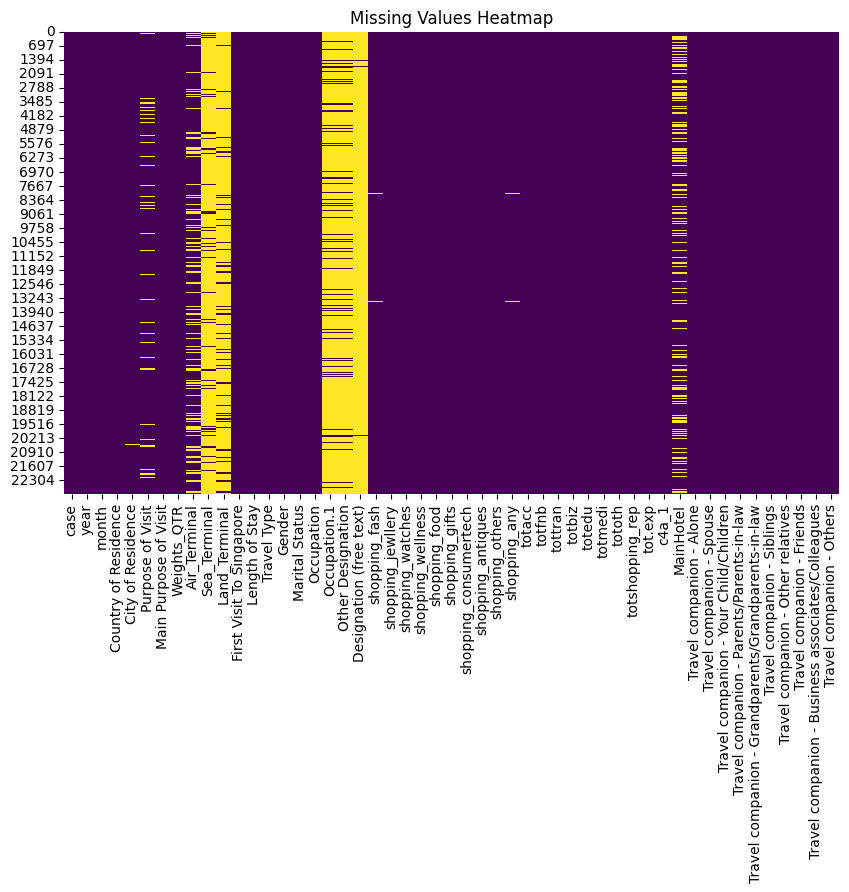

Cleaned Shape: (22974, 51)
Cleaned Missing:
 case                                                   0
year                                                   0
month                                                  0
Country of Residence                                   0
City of Residence                                      0
Purpose of Visit                                       0
Main Purpose of Visit                                  0
Weights_QTR                                            0
Air_Terminal                                           0
Sea_Terminal                                           0
Land_Terminal                                          0
First Visit To Singapore                               0
Length of Stay                                         0
Travel Type                                            0
Gender                                                 0
Marital Status                                         0
Occupation                                 

/tmp/ipython-input-1979234097.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1979234097.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

<Figure size 800x400 with 0 Axes>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data (use your GitHub raw URL)
url = 'https://raw.githubusercontent.com/janicewee/STB/main/data.xlsx'
df = pd.read_excel(url)  # If multiple sheets, add sheet_name='Sheet1'

# 1. Basic Overview
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())
print('Data Types:\n', df.dtypes)
print('Missing Values:\n', df.isnull().sum())
print('Duplicates:', df.duplicated().sum())

# 2. Summary Statistics
print('Summary:\n', df.describe(include='all'))

# 3. Check Unique Values for Categorical Columns (assume 'Gender', 'Location')
# Replace with your categorical columns
for col in ['Gender', 'Location']:  # Adjust based on your columns
    if col in df.columns:
        print(f'Unique in {col}:\n', df[col].value_counts())

# 4. Detect Outliers (for numeric, e.g., 'Age', 'Satisfaction_Score')
for col in ['Age', 'Satisfaction_Score']:  # Adjust
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
        print(f'Outliers in {col}:\n', outliers)

# 5. Visualizations (e.g., missing values heatmap, boxplots)
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

plt.figure(figsize=(8,4))
if 'Age' in df.columns:
    sns.boxplot(x=df['Age'])
    plt.title('Age Boxplot for Outliers')
    plt.show()

# 6. Address Issues (Example Fixes)
# Drop duplicates
df = df.drop_duplicates()

# Impute missing (mean for numeric, mode for categorical)
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Standardize categorical (e.g., Gender to lowercase)
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].str.lower().str.strip()
    df['Gender'] = df['Gender'].replace({'m': 'male', 'f': 'female'})

# Validate ranges (e.g., Age 18-100)
if 'Age' in df.columns:
    df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

print('Cleaned Shape:', df.shape)
print('Cleaned Missing:\n', df.isnull().sum())